About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [3]:
pip install --upgrade pandas matplotlib

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/Users/admin/opt/anaconda3/envs/deepfake/lib/python3.11/site-packages/pip/__init__.py", line 21, in <module>
    from pip._vendor.requests.packages.urllib3.exceptions import DependencyWarning
  File "/Users/admin/opt/anaconda3/envs/deepfake/lib/python3.11/site-packages/pip/_vendor/requests/__init__.py", line 65, in <module>
    from . import utils
  File "/Users/admin/opt/anaconda3/envs/deepfake/lib/python3.11/site-packages/pip/_vendor/requests/utils.py", line 27, in <module>
    from .cookies import RequestsCookieJar, cookiejar_from_dict
  File "/Users/admin/opt/anaconda3/envs/deepfake/lib/python3.11/site-packages/pip/_vendor/requests/cookies.py", line 172, in <module>
    class RequestsCookieJar(cookielib.CookieJar, collections.MutableMapping):
                          

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the [dataset about Pokemons](https://www.kaggle.com/datasets/abcsds/pokemon)

In [138]:
my_data = pd.read_csv('Pokemon.csv')
my_data.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
593,533,Gurdurr,Fighting,NaN,405,85,105,85,40,50,40,5,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
451,406,Budew,Grass,Poison,280,40,30,35,50,70,55,4,False


# Task 1 (1 point)

Investigate  the type of every feature. Is it numerical or cetegorical (nominal or ordinal)? Explain, why.

You may need to check the type of the column or consult the description of the data on Kaggle.com

In [139]:
my_data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

**Answer** \#Categorical (nominal) features in the current dataset: Name, Type 1 and Type 2, Legendary. Categorical (ordinal) features: Generation (this is a unique case, when numerical variable is treated as categorical). Numerical: # as an identifier, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed. 

Name, Type 1, Type 2 and Legendary are categorical (nominal), because we can't perform arithmetic operations with these variables, they are exclusive, no numerical meaning. 
Generation is categorical (ordinal), because it represents a clear ordering and has limited set of discrete values. 
Other features are all quantitative characteristics of the pokemons (except for #, but it is not meant for calculations).

# Task 2 (1 point)

It is said in the description of the dataset that `Total` is the sum of the stats after it. Let's check, if it is true.

Create a new column `'New Total'`, what is the sum of `HP, 	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed`

In [141]:
my_data['New Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
my_data.sample(4)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Total
392,359,Absol,Dark,NaN,465,65,130,60,75,60,75,3,False,465
664,603,Eelektrik,Electric,NaN,405,65,85,70,75,70,40,5,False,405
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False,385
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True,680


In [142]:
my_data['New Total']

0      318
1      405
2      525
3      625
4      309
      ... 
795    600
796    700
797    600
798    680
799    600
Name: New Total, Length: 800, dtype: int64

Now, print the number of rows that contain deifferent   `'Total'` and `'New Total'` values and depict these rows.

Hint: compare columns `'Total'` and `'New Total'` and filter rows using the comparison.


In [147]:
different_totals =my_data[my_data['Total'] !=my_data['New Total']]

In [148]:
print(f"Number of rows with different Total values: {len(different_totals)}")

Number of rows with different Total values: 0


# Task 3 (2 points)

Create a frequency table for the `'Type 1'` feature

In [149]:
my_data['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [150]:
type1_counts = my_data['Type 1'].value_counts()

Also, add proportions and percentage for every type  to the table.

Hint: `Series.to_frame` may be a useful function

In [151]:
type1_my_data = type1_counts.to_frame(name='Count')

In [152]:
type1_my_data['Proportion'] = type1_my_data['Count'] / len(my_data)
type1_my_data['Percentage'] = (type1_my_data['Proportion'] * 100).round(2).astype(str) + '%'

In [153]:
print(type1_my_data)

          Count  Proportion Percentage
Type 1                                
Water       112     0.14000      14.0%
Normal       98     0.12250     12.25%
Grass        70     0.08750      8.75%
Bug          69     0.08625      8.62%
Psychic      57     0.07125      7.12%
Fire         52     0.06500       6.5%
Electric     44     0.05500       5.5%
Rock         44     0.05500       5.5%
Dragon       32     0.04000       4.0%
Ground       32     0.04000       4.0%
Ghost        32     0.04000       4.0%
Dark         31     0.03875      3.88%
Poison       28     0.03500       3.5%
Steel        27     0.03375      3.38%
Fighting     27     0.03375      3.38%
Ice          24     0.03000       3.0%
Fairy        17     0.02125      2.12%
Flying        4     0.00500       0.5%


Draw a plot to depict the percentage. Make sure to make labels/ticks readable.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon'),
  Text(15, 0, 'Dark'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

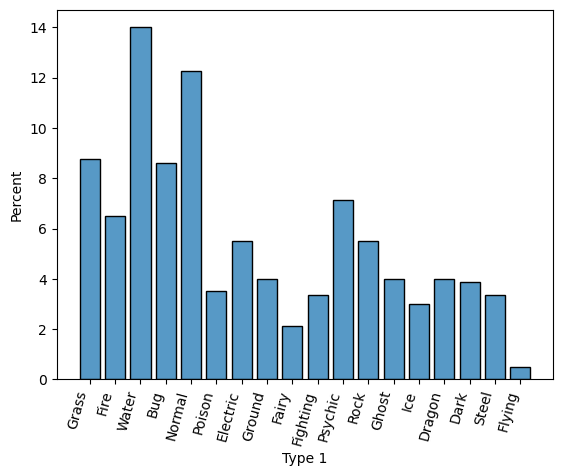

In [157]:
sns.histplot(data= my_data, x ='Type 1', stat ='percent', shrink =0.8)
plt.xticks(rotation= 75, ha='right')

Draw conclusions from the plot. (Are there a lot of differnet types? What is the most/least popular type? ...)

**Answer** \#Yes, there are a lot of types. According to the plot, Water and Normal appear to be the most popularf types, while Fairy and Flying are the least popular. Regarding the general distribution, there is a considerable imbalance across types. That is, the top three types (Water, Normal, Grass) together account for about 35% of all Pokemon.

# Task 4 (2 points)

Compue the measures of central tendency for the `Sp. Atk` feature

In [159]:
col= 'Sp. Atk'
my_data['Sp. Atk'].mean()

72.82

In [160]:
my_data['Sp. Atk'].median()

65.0

In [161]:
my_data['Sp. Atk'].mode()

0    60
Name: Sp. Atk, dtype: int64

Draw a histogram for the feature and depict the measures on it

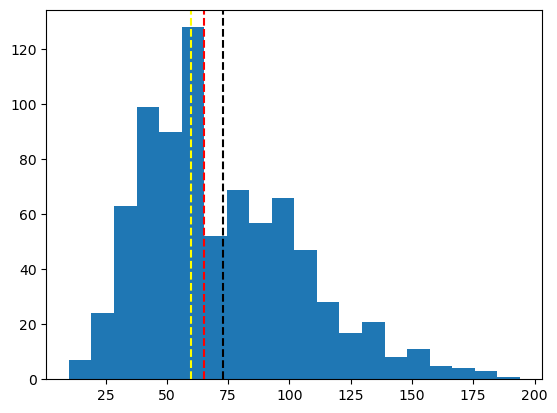

In [163]:
plt.hist(my_data['Sp. Atk'], bins=20)

plt.axvline(my_data['Sp. Atk'].mean(), linestyle='--', c ='black', label ='mean')
plt.axvline(my_data['Sp. Atk'].median(), linestyle='--', c ='red', label ='median')
plt.axvline(my_data['Sp. Atk'].mode()[0], linestyle='--', c ='yellow', label ='mode')

plt.show()

Is the distribution skewed? Explain your answer.

**Answer** \#yes,it is. It is positively skewed. We can see that from the following characteristics: the tail of the distribution extends further to the right (toward higher values) than to the left; the mean (shown by the black dashed line) is to the right of both the median (red dashed line) and mode (yellow dashed line); mean is higher than median and higher than mode, which is a classical case of positively skewed distributions

# Task 5 (2 point)

Now, compute measures of central tendencies for legendary and not legendary separately. Is there any difference?

In [164]:
my_data.groupby('Legendary').agg({
    'Total': ['mean', 'median'],
    'HP': ['mean', 'median'],
    'Attack': ['mean', 'median'],
    'Defense': ['mean', 'median'],
    'Sp. Atk': ['mean', 'median'],
    'Sp. Def': ['mean', 'median'],
    'Speed': ['mean', 'median']
})

Total                HP             Attack           Defense  \
                 mean median       mean median        mean median       mean   
Legendary                                                                      
False      417.213605  425.0  67.182313   65.0   75.669388   72.0  71.559184   
True       637.384615  600.0  92.738462   91.0  116.676923  110.0  99.661538   

                     Sp. Atk            Sp. Def              Speed         
          median        mean median        mean median        mean median  
Legendary                                                                  
False       66.0   68.454422   65.0   68.892517   65.0   65.455782   64.0  
True       100.0  122.184615  120.0  105.938462  100.0  100.184615  100.0

**Answer** \#I computed the differences between Legendary and Non-Legendary pokemons in case of Mean and Median tendencies.  We see that Legendary pokemons are generally stronger than non-legendary ones: if we consider 'Total' variable, mean value suggests that legendary pokemons are about 220 points stronger on average, median -- that a median legendary pokemon is 175 points stronger than non-legendary one.

Draw the hisograms on one plot.

Hint: use `hue` in `sns.histplot`

<Axes: xlabel='Total', ylabel='Count'>

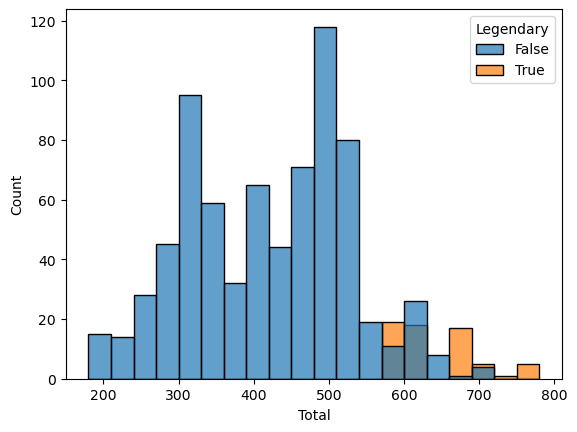

In [165]:
sns.histplot(data=my_data, x='Total', hue='Legendary', bins=20, alpha=0.7)

# Task 6 (2 point)

There is a problem that bars for legendary pokemons are significantly smaller than the bars for non-legendary. Explain, why is it happening

In [168]:
legendary= my_data[my_data['Legendary'] == True].shape[0]
non_legendary= my_data[my_data['Legendary'] == False].shape[0]
total= my_data.shape[0]

In [169]:
legendary_perc= (legendary / total) * 100
non_legendary_perc= (non_legendary / total) * 100

print(legendary_perc)

8.125


In [170]:
print(non_legendary_perc)

91.875


**Answer** \#We see that the difference is very high -- 8% of legendary and 92% of non-legendary pokemons. There is  a substantial imbalance in the dataset, which is now also represented in percentage. 

Fix the histogram (make the bars comparable hights), so it wil be more convenient to compare the distributions.

Hint: consult the [documentation for the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) and find, which optional arguments may help.

<Axes: xlabel='Total', ylabel='Percent'>

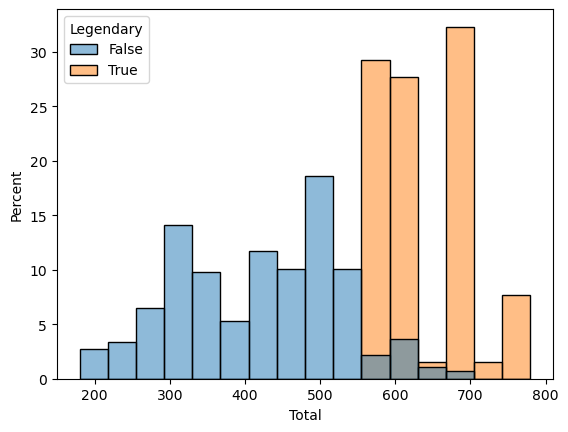

In [173]:
sns.histplot(data= my_data, x= 'Total', hue ='Legendary', stat ='percent', common_norm =False)

Now, make conclusions about the distributions

**Answer** \#I decided to use Percentage instead of Count. Now we can see that non-legendary pokemons are primarily distributed between 180-650 total stats range, while legendary pokemons are primarily distributed between 550-780 total stats. Over 55% of legendary pokemons have Total stats concentrated in the 580-620 range, while approx. 